Import Libaries

In [2]:
import pandas as pd
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import json
import matplotlib.pyplot as plt

 Load the LastFM Dataset

In [3]:
# Load the preprocessed LastFM graph and targets
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')
lastfm_targets = pd.read_csv('data/lastfm_targets_processed.csv')

Feature Extraction for LastFM Dataset

In [5]:
def extract_features_lastfm(graph, targets):
    degree = dict(graph.degree())
    clustering = nx.clustering(graph)
    betweenness = nx.betweenness_centrality(graph)
    
    features = pd.DataFrame({
        'node': list(graph.nodes()),
        'degree': [degree[node] for node in graph.nodes()],
        'clustering': [clustering[node] for node in graph.nodes()],
        'betweenness': [betweenness[node] for node in graph.nodes()],
        'target': targets['target']
    })
    
    return features
lastfm_features = extract_features_lastfm(lastfm_graph, lastfm_targets)
print(lastfm_features.head())

   node  degree  clustering  betweenness  target
0     0       1    0.000000     0.000000       8
1   747       8    0.250000     0.000367      17
2     1      10    0.022222     0.002306       3
3  4257      27    0.045584     0.004210      17
4  2194      23    0.225296     0.001319       5


Scatterplot of Degree vs. Clustering Coefficient

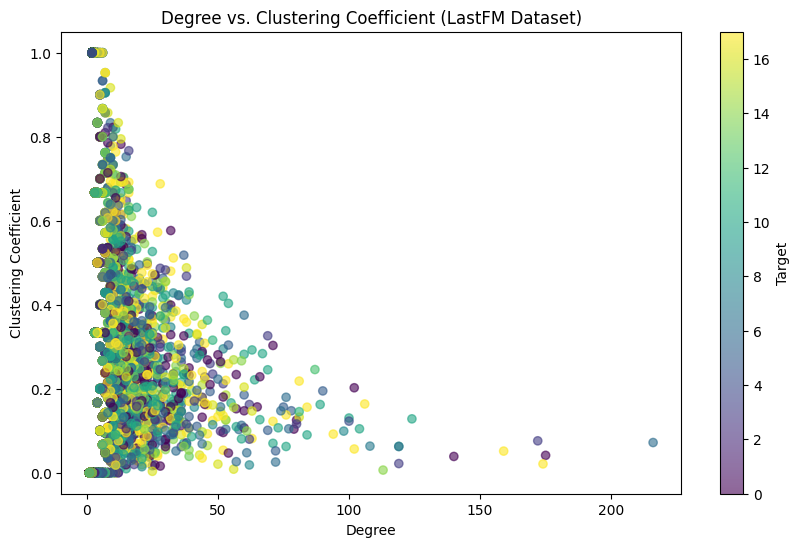

In [6]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(lastfm_features['degree'], lastfm_features['clustering'], c=lastfm_features['target'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Target')
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.title('Degree vs. Clustering Coefficient (LastFM Dataset)')
plt.show()

Scatterplot of Betweenness vs. Clustering Coefficient

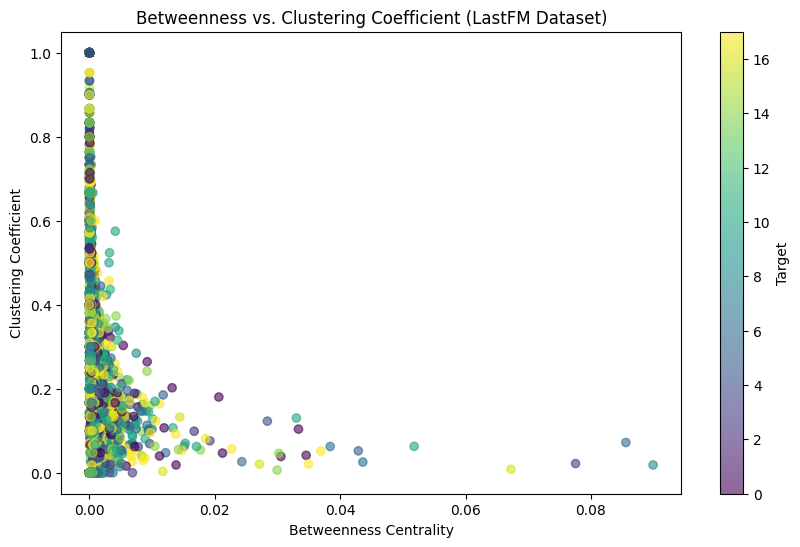

In [7]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(lastfm_features['betweenness'], lastfm_features['clustering'], c=lastfm_features['target'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Target')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('Betweenness vs. Clustering Coefficient (LastFM Dataset)')
plt.show()

Train-Test Split and Model Training for LastFM Dataset

In [8]:
X_lastfm = lastfm_features[['degree', 'clustering', 'betweenness']]
y_lastfm = lastfm_features['target']

X_train_lastfm, X_test_lastfm, y_train_lastfm, y_test_lastfm = train_test_split(X_lastfm, y_lastfm, test_size=0.3, random_state=42)


In [9]:

# Random Forest Classifier
rf_clf_lastfm = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_lastfm.fit(X_train_lastfm, y_train_lastfm)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [10]:

# Support Vector Machine (SVM) Classifier
svm_clf_lastfm = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_clf_lastfm.fit(X_train_lastfm, y_train_lastfm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

Model Evaluation for LastFM Dataset

In [11]:



# Random Forest Evaluation
y_pred_rf_lastfm = rf_clf_lastfm.predict(X_test_lastfm)
print("Random Forest Classification Report (LastFM Dataset):")
print(classification_report(y_test_lastfm, y_pred_rf_lastfm))




Random Forest Classification Report (LastFM Dataset):
              precision    recall  f1-score   support

           0       0.16      0.13      0.14       334
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        22
           3       0.05      0.04      0.04       135
           4       0.00      0.00      0.00         3
           5       0.05      0.03      0.03       108
           6       0.09      0.05      0.06       207
           7       0.00      0.00      0.00        32
           8       0.06      0.04      0.05       138
           9       0.00      0.00      0.00        17
          10       0.18      0.12      0.15       411
          11       0.04      0.03      0.04        32
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        20
          14       0.08      0.06      0.07       173
          15       0.00      0.00      0.00        82
          16       0.03    

In [12]:
# SVM Evaluation
y_pred_svm_lastfm = svm_clf_lastfm.predict(X_test_lastfm)
print("SVM Classification Report (LastFM Dataset):")
print(classification_report(y_test_lastfm, y_pred_svm_lastfm))

SVM Classification Report (LastFM Dataset):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       334
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00       135
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00       138
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00       411
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00       173
          15       0.00      0.00      0.00        82
          16       0.00      0.00    

/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param